# <center>Deep NN</center>
## <div align=right>Made by:</div>
**<div align=right>Manoj Jereddy</div>**
**<div align=right>Jing Liu</div>**
**<div align=right>Ihor</div>**

In [1]:
import pandas as pd
import pickle

import keras

from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import joblib

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def preprocessing(X, scaler_filename='scaler.save', columns_to_use_filename='columns_to_use'):
    
    scaler = joblib.load(scaler_filename)
    
    with open (columns_to_use_filename, 'rb') as fp:
        columns_to_use = pickle.load(fp)    
    
    X = X.loc[:, columns_to_use]
    
    numerical_X = X.loc[:, X.dtypes != 'object']
    numerical_X = pd.DataFrame(scaler.transform(numerical_X), columns=numerical_X.columns)
    numerical_X = numerical_X.fillna(0)
    return numerical_X 

In [3]:
def evaluate(model, X_val, y_val):
    y_pred = model.predict_classes(X_val).ravel()
    f1 = f1_score(y_val, y_pred , average="macro")
    fpr, tpr, thresholds = roc_curve(y_val, y_pred)
    auc_model = auc(fpr, tpr)
    conf = pd.DataFrame(confusion_matrix(y_val, y_pred), columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
    prec = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    acc = accuracy_score(y_val, y_pred)
    
    return {'auc': auc_model, 
            'f1':f1, 
            'confusion':conf, 
            'precision': prec,
            'recall': recall,
            'accuracy': acc,
            'roc_cache': (fpr, tpr)}

### Prediction and evaluation function

In [4]:
def predict_and_evaluate(filename, model_file='model.json', weights_file='model.h5'):
    data = pd.read_csv(filename)
    X = data.drop(columns='Flag')
    y = data.Flag
    X_preprocessed = preprocessing(X)
    
    with open(model_file, 'r') as json_file:
        loaded_model_json = json_file.read()

    model = keras.models.model_from_json(loaded_model_json)
    model.load_weights(weights_file)
    
    return evaluate(model, X_preprocessed, y), model.predict_classes(X_preprocessed)

#### Launch here:

`history` will contain various metrics.  
`y_pred` will contain actual predictions.

In [5]:
history, y_pred = predict_and_evaluate('Data.csv')

C:\Users\Dergel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (328,336) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\Dergel\Anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 0.22.2.post1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [6]:
history

{'auc': 0.6745120986851532,
 'f1': 0.5021991319161101,
 'confusion':         pred_0  pred_1
 true_0   20433   14975
 true_1     935    3165,
 'precision': 0.17447629547960308,
 'recall': 0.7719512195121951,
 'accuracy': 0.5972967500253114,
 'roc_cache': (array([0.        , 0.42292702, 1.        ]),
  array([0.        , 0.77195122, 1.        ]))}

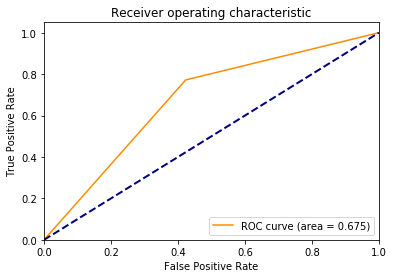

In [7]:
fpr, tpr = history['roc_cache']
plt.plot(fpr, tpr, color='darkorange', label=f"ROC curve (area = {round(history['auc'], 3)})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [8]:
y_pred

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]])